STANDARD SCALAR FOR MACHINE LEARNING 
we won't go into the math. In machine learning a huge problem is the magnitude of the features. Different features have very different size in magnitude, but we want to approximise them into a similar range. We then use scaler. It takes a bunch of data. It centers in zero and 68% between -1 and 1, and then outliars. 
Each feature will have the same importance in this way. 

## Standard Scaler for Machine Learning 📊

The standard scaler is a machine learning preprocessing technique that transforms data so that each feature has a mean of 0 and a standard deviation of 1. This is important because it helps to prevent any one feature from dominating the model.

**Percentile Interpretation**. Approximately **68%** of the data points in a dataset with a standard deviation of 1 will fall within one standard deviation of the mean (i.e., within one unit above or below the mean).

For example, if one feature has a much larger range of values than the other features, the model may learn to focus on that feature and ignore the other features.

The standard scaler is a simple and effective way to scale numerical data. It is also very computationally efficient, making it ideal for large datasets.

In [1]:
import pandas as pd 
import seaborn as sns 

In [2]:
startup_df = pd.read_csv("50_Startups.csv")

In [9]:
from sklearn.preprocessing import StandardScaler
#sklearn preprocessing make raw vectors more prepared for downstream estimators

print("Original:")
print(startup_df.head(5))

X=startup_df.drop(['Profit','State'], axis = 1) #axis is to have clear the fact that we are dropping something between columns
print("\nBefore:")
print(X.head(5))

#scale the dataset: we need to use fit_transform from sklearn standard scaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

print()
print('After:')
print(X[:5,:]) #axis 0 so it prints the first five rows and all the columns 

Original:
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

Before:
   R&D Spend  Administration  Marketing Spend
0  165349.20       136897.80        471784.10
1  162597.70       151377.59        443898.53
2  153441.51       101145.55        407934.54
3  144372.41       118671.85        383199.62
4  142107.34        91391.77        366168.42

After:
[[ 2.01641149  0.56075291  2.15394309]
 [ 1.95586034  1.08280658  1.9236004 ]
 [ 1.75436374 -0.72825703  1.62652767]
 [ 1.55478369 -0.09636463  1.42221024]
 [ 1.5049372  -1.07991935  1.28152771]]


we decided to apply thae standard scaler to a certain dataset. We can print the result before and after the standard scaling. If we take the administration, to have an idea about the fact that we have something greater then 1, then we can look at the general graphs describing data. 

## Splitting the Dataset into Train and Test Set 🔪

Splitting the dataset into a train and test set is an important step in machine learning. The train set is used to train the model, and the test set is used to evaluate the performance of the trained model on unseen data.

This is important because it helps to prevent overfitting. Overfitting occurs when a model learns the training data too well and is unable to generalize to new data.

A common split ratio is 80/20, meaning that 80% of the data is used for the train set and 20% of the data is used for the test set.

Here is an example of how to split the dataset into a train and test set using scikit-learn:



SPLITTING THE DATASET: into train and test data. We need to distringuish train and test data to avoid overfitting. If we train with all the data we have, we won't get an idea in the accuracy of our model. the test dataset is used to validate the model we've built. 

In [10]:
from sklearn.model_selection import train_test_split

#startup_df.drop(...) return the dataset without the column profit, because we want to predict that column
X = startup_df.drop('Profit', axis = 1)
y = startup_df['Profit']

#split the dataset into train and test sets 
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state =42)

## Putting all together 🤲

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#one hot encode the categorical variable "State"
startup_df_dummies = pd.get_dummies(startup_df, columns = ['State'])

X = startup_df_dummies.drop('Profit', axis = 1)
y = startup_df['Profit']

#spit the dataset intp train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

#standardize the data
#first make sure to pass the data in the right data type: standardscaler expect 2D data
#the reshape method is used to reshape an array in python: changing the shape of an array, so the number of elements in each dimention
y_train = y_train.values.reshape(-1,1) 
#using (-1,1) we get a column vector starting from an array
#-1 stands for un unkown number of rows, while 1 id for the fact that we have a column only
y_test = y_test.values.reshape(-1,1)

#then procede as before
scaler_y = StandardScaler()
scaler_y.fit(y_train) 
#.fit() calculates the mean and standard deviation necessary for scaling the data. Essentially, it learns the parameters needed for scaling.
y_train = scaler_y.transform(y_train)
y_test = scaler_y.transform(y_test)

print(X_train[:5])
print(y_train[:5])

    R&D Spend  Administration  Marketing Spend  State_California  \
12   93863.75       127320.38        249839.44             False   
4   142107.34        91391.77        366168.42             False   
37   44069.95        51283.14        197029.42              True   
8   120542.52       148718.95        311613.29             False   
3   144372.41       118671.85        383199.62             False   

    State_Florida  State_New York  
12           True           False  
4            True           False  
37          False           False  
8           False            True  
3           False            True  
[[ 0.62505458]
 [ 1.21802035]
 [-0.61948176]
 [ 0.8811677 ]
 [ 1.62086118]]


# Linear Regression 📈
Linear Regression (LR) is a fundamental and versatile machine learning method used for various tasks in the world of data science and statistics. At its core, LR is all about finding a linear relationship between one or more independent variables (features) and a dependent variable (target). 🧮

### Assumptions of Linear Regression

1. **Linearity**: The relationship between the independent and dependent variable is linear.
2. **Independence**: The observations are independent of each other.
3. **Homoscedasticity**: The variance of residual is the same for any value of \( x \).
4. **Normality**: For any fixed value of \( x \), \( y \) is normally distributed.

### Advantages of Linear Regression

- Simple to understand and explain.
- Fast to model and is particularly useful when the relationship to be modeled is not extremely complex and if you don't have a lot of data.

### Limitations of Linear Regression

- Assumes a linear relationship between the dependent and independent variables.
- Sensitive to outliers.
- Can sometimes oversimplify the model, which might make it underfit.

## When to Use Linear Regression?

Linear Regression is a go-to choice when you want to:

1. Predict a Continuous Target: LR is primarily used for predicting continuous numeric values, making it suitable for problems like predicting stock prices, house prices, or exam scores. 📊
2. Understand Relationships: It helps you understand the relationships between variables. LR can reveal how one or more features influence the target variable and the direction and strength of those influences. 🔍
3. Assumptions: However, it's important to note that LR relies on certain assumptions, including linearity, independence of errors, and homoscedasticity (constant variance). Violations of these assumptions may affect the model's performance.

## Using scikit-learn's LinearRegression

In Python, scikit-learn (sklearn) provides a powerful library for building machine learning models, including Linear Regression. Here's how to use the LinearRegression class:


LINEAR REGRESSION
Linear regression is fondamental and versatile machine learning used for varoius tacks in the world of data science and statistics. If we have some data that is not linear correlated, linear regression fails completely, but some times it's very useful as simple as it is. 

ASSUMPTIONS OF LINEAR REGRESSION:
linearity, indipendence, homoscedasticity, normalitiy. 
if there's dependence between input and output then linear regression would fail completely. Since it's the most basic possible regression, sometimes it semplify too much the model.

In [12]:
from sklearn.linear_model import LinearRegression

#create a linear regression model
model = LinearRegression()

#train the model on the standardized data
model.fit(X_train, y_train)

#then we want to analyse the accuracy of our model. 
#I want to know how much I'm distat from the real value

LinearRegression()

1. Import: Start by importing the LinearRegression class from scikit-learn's linear_model module.
2. Model Creation: Create an instance of the LinearRegression class. This initializes the LR model.
3. Training: Use the fit method to train the model on your training data (X_train and y_train), where X_train contains feature data, and y_train contains the corresponding target values.

Remember that LR assumes a linear relationship between features and the target, so it's crucial to preprocess your data, handle outliers, and validate the model to ensure it meets the assumptions and provides accurate predictions. 🧐

Linear Regression is just one tool in your machine learning toolbox, but it's a valuable one for many real-world problems. 🛠️✨






# Evaluating Errors 📊
In machine learning, it's crucial to assess how well your model performs on unseen data. This evaluation helps you understand whether your model's predictions are accurate and reliable. One common way to do this is by using various metrics to measure the performance:

## Mean Squared Error (MSE)
Mean Squared Error (MSE) is a fundamental regression metric that quantifies the average squared difference between the predicted values and the actual values in your dataset. It measures the model's ability to make predictions close to the true values. Here's how it's calculated:

1. For each data point, calculate the squared difference between the predicted value (y_pred) and the actual value (y_test or y_train).
2. Sum up all these squared differences.
3. Divide the sum by the total number of data points.

The purpose of using MSE is to get a sense of how far off the model's predictions are from the actual values. Lower MSE values indicate that the model's predictions are closer to the true values, while higher values suggest larger prediction errors.

## Coefficients
In the context of linear regression, coefficients represent the weights assigned to each feature (independent variable) in the model. These coefficients determine the slope and direction of the linear relationship between the features and the target variable. The code snippet prints out the coefficients for each feature in your model.

The purpose of examining coefficients is to understand the influence of each feature on the target variable. Positive coefficients indicate a positive relationship, meaning an increase in the feature value leads to an increase in the target variable. Negative coefficients imply the opposite.

⚠️ When both independent and dependent variables are **standardized**, the coefficients represent the change in the dependent variable (in standard deviation units) for a one-standard-deviation change in the independent variable. This allows for a direct comparison of the **importance** of different variables.
The coefficients still maintain their relationship with the target variable *directionally* (positive or negative).


## Model Score
The model score (often called the R-squared score or coefficient of determination) quantifies the proportion of the variance in the target variable that's explained by the model. It's a value between 0 and 1, where higher values indicate a better fit of the model to the data. The code calculates the model score using model.score().

## Purpose of Metrics:

**MSE**: It quantifies the quality of your model's predictions in terms of error. Lower MSE values are desirable as they indicate better predictive performance.

**Coefficients**: Understanding feature coefficients helps you identify which features are the most influential in your model. This information can be valuable for feature selection and understanding the relationships in your data.

**Model Score**: The R-squared score provides a quick assessment of how well your model captures the variance in the target variable. It helps you gauge whether the model is a good fit for the data.

By measuring these metrics, you gain insights into your model's performance, discover any areas for improvement, and make informed decisions about model selection and feature engineering.

Unsupervised and supervised learinig: to know the difference. We go into the evaluation error. 

In [13]:
#MEAN SQUARE ERROR: first school to test the accuracy of our model.
#it gives the idea, without working so much on the way we need to consider the numbers.
from sklearn.metrics import mean_squared_error

#remind: the model we are using here it's linear regression 

#evaluate the model on the standardized test set
#after the model has being trained with the .fit() method, you can use the methos .predict() to predict features on new data
y_pred = model.predict(X_test) #we would predcit y with the test data, through the model we built with the train data 
score = model.score(X_test,y_test)
print(f"Test score:\n{score: 3f}")

#mean square error
print("\nMSE on train set:")
print(mean_squared_error(y_train, model.predict(X_train)))

print("\nMSE on test set:")
print(mean_squared_error(y_test,model.predict(X_test)))

#evaluate the coefficients
print("\nCoefficients:")
ind_var_name = X.columns
for el in zip(ind_var_name, model.coef_.ravel()):
    #The zip() function works by aggregating elements element-wise. 
    # If you have multiple iterables, zip() creates an iterator that generates tuples where
    #the first element of each tuple comes from the first iterable, the second element comes from the second iterable, and so on.
    
    #The method .ravel() is used to flatten arrays, 
    # meaning it converts a multidimensional array into a one-dimensional array by unraveling or flattening it.
    print(el[0],':',el[1])

Test score:
 0.898727

MSE on train set:
0.0462980004751475

MSE on test set:
0.047640062294235244

Coefficients:
R&D Spend : 1.9417238165159358e-05
Administration : -1.6579206179156396e-06
Marketing Spend : 7.195737496225089e-07
State_California : -0.007598380122923485
State_Florida : 0.015028341754990049
State_New York : -0.007429961632066566


# GIGO: Garbage In, Garbage Out 🗑️

GIGO, or "garbage in, garbage out", is a principle in computer science that states that the quality of output is determined by the quality of the input. This means that if you provide a computer with inaccurate or incomplete data, it will produce inaccurate or incomplete results.

GIGO is an important concept to understand when using machine learning models. Machine learning models are trained on data, and if the data is flawed, the model will be flawed as well.

In our case, we are having too many data in our model


In [ ]:
#there's not a single way to take decision after having calculated the MSE. 
#0.9 is a good starting point for the test_score 

#coefficient is the most important part. 
#Each coefficient scale the value of each specific spending, 
# so that we can adjust every coefficient

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

X = startup_df.drop(['Profit', 'State', 'Administration'], axis=1)
y = startup_df['Profit']
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
## First make sure to pass the data in the right data type: StandarScaler expects 2D data:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

## Then procede as before
scaler_y = StandardScaler()
scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test = scaler_y.transform(y_test)

# Create a linear regression model
model = LinearRegression()

# Train the model on the standardized data
model.fit(X_train, y_train)

# Evaluate the model on the standardized test set
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
print(f'Test score:\n{score:.3f}')

# Mean Square Error
print("\nMSE on train set:")
print(mean_squared_error(y_train, model.predict(X_train)))

print("\nMSE on test set:")
print(mean_squared_error(y_test, model.predict(X_test)))

# Evaluate the coefficients
print("\nCoefficients:")
ind_var_name = X.columns
for el in zip(ind_var_name, model.coef_.ravel()):
  print(el[0], ':', el[1])

Test score:
0.917

MSE on train set:
0.04811717131364236

MSE on test set:
0.03912023140270625

Coefficients:
R&D Spend : 1.888083169903928e-05
Marketing Spend : 9.45754542775207e-07


LINEAR REGRESSION is so simple that we can interpret it so clearly. This approach GIGO: iterate the testing to get the idea of what it's useful for the model and what it's not. Optimize the model!!

In [5]:
#in the end we have a better score via removing information. 
# the test score is indeed increasing 

#we need to get the whole analysis. Then, you can make the algorithms more performing. 
#so first of all analysis and then go on with it. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#method that sets the aesthetic parameters in the background to control the style of the plots.
#This function enables you to customize the appearance of your visualizations. By calling sns.set(), 
# it typically sets the default style for Seaborn's plots.
import warnings 
warnings.filterwarnings('ignore')
#the warnings module in Python is used to handle warnings generated during code execution. 
# Here, it's imported, and the line warnings.filterwarnings('ignore') is used to suppress the display of warning messages, 
# ensuring that they do not appear in the output.
%matplotlib inline
#it sets the backend of matplotlib to render plots within the Jupyter Notebook itself. 
# This way, when you create plots using libraries like Seaborn or Matplotlib, the plots will be displayed directly in the notebook below the code cell where the plot code is written.

#plt.style.use('ggplot')

# OSEMN Pipeline 

* O - Obtaining our data
* S - Scrubbing / Cleaning our data
* E - EDA - Explorative Data Analysis or Exploring / Visualizing our data will allow us to find patterns and trends
* M - Modeling our data will give us our predictive power as a wizard
* N - INterpreting our data


For reference : https://www.linkedin.com/pulse/life-data-science-osemn-randy-lao/?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_post_details%3BmDlg5VsdSBCLBps2R0vRZA%3D%3D

let's go on: OSEMN PIPELINE
 We'll use some greater dataset now. We want to predcit the diabets in India for female given all the variables. 
 Obtain the data, clean the data, explore the data to undestand which kind of infromation is giving, and last step to interpret the data. We are going to check the internal of the dataset. 

## About the Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database.

In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Download from https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [20]:
diabetes_data = pd.read_csv("diabetes.csv")

diabetes_data.head()
#there's a values that is strange: insulin! It can't be zero!!! So that needs to be interpreted as a nonvalue. 
#zero is a number, but not a significant one for our dataset. 
#we already saw describe and transposition describe too. 
#If we just go the the min, we see that there are many zeros, so we understand there are so many missing values. 
#we have to manage the missing values. Each white line is a missing value. There are 5 missing values in glucose for exampke (you see in the figure, just for example)

diabetes_data.sample(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
441            2       83             66             23       50  32.2   
227            3      162             52             38        0  37.2   
614           11      138             74             26      144  36.1   
113            4       76             62              0        0  34.0   
249            1      111             86             19        0  30.1   

     DiabetesPedigreeFunction  Age  Outcome  
441                     0.497   22        0  
227                     0.652   24        1  
614                     0.557   50        1  
113                     0.391   25        0  
249                     0.143   23        0

# Basic EDA and statistical analysis


In [21]:
## gives information about the data types,columns, null value counts, memory usage etc
## function reference : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
diabetes_data.info(verbose=True)

#It provides a concise summary of a DataFrame, 
# including information about the DataFrame's index, column data types, non-null values, and memory usage.
#if verbose is set to true then you would have further information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**DataFrame.describe()** method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the describe() method:
* count tells us the number of non-empty rows in a feature.
* mean tells us the mean value of that feature.
* std tells us the Standard Deviation Value of that feature.
* min tells us the minimum value of that feature.
* 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
* max tells us the maximum value of that feature.

In [22]:
## basic statistic details about the data (note only numerical columns would be displayed here unless parameter include="all")
## for reference: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe
diabetes_data.describe()
diabetes_data.describe().T
## Also see :
##to return columns of a specific dtype: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html#pandas.DataFrame.select_dtypes

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

### The Question creeping out of this summary

#### Can minimum value of below listed columns be zero (0)?

On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:
1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI

#### It is better to replace zeros with NaN since after that counting them would be easier and zeros need to be replaced with suitable values

In [28]:
pip install missingno

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


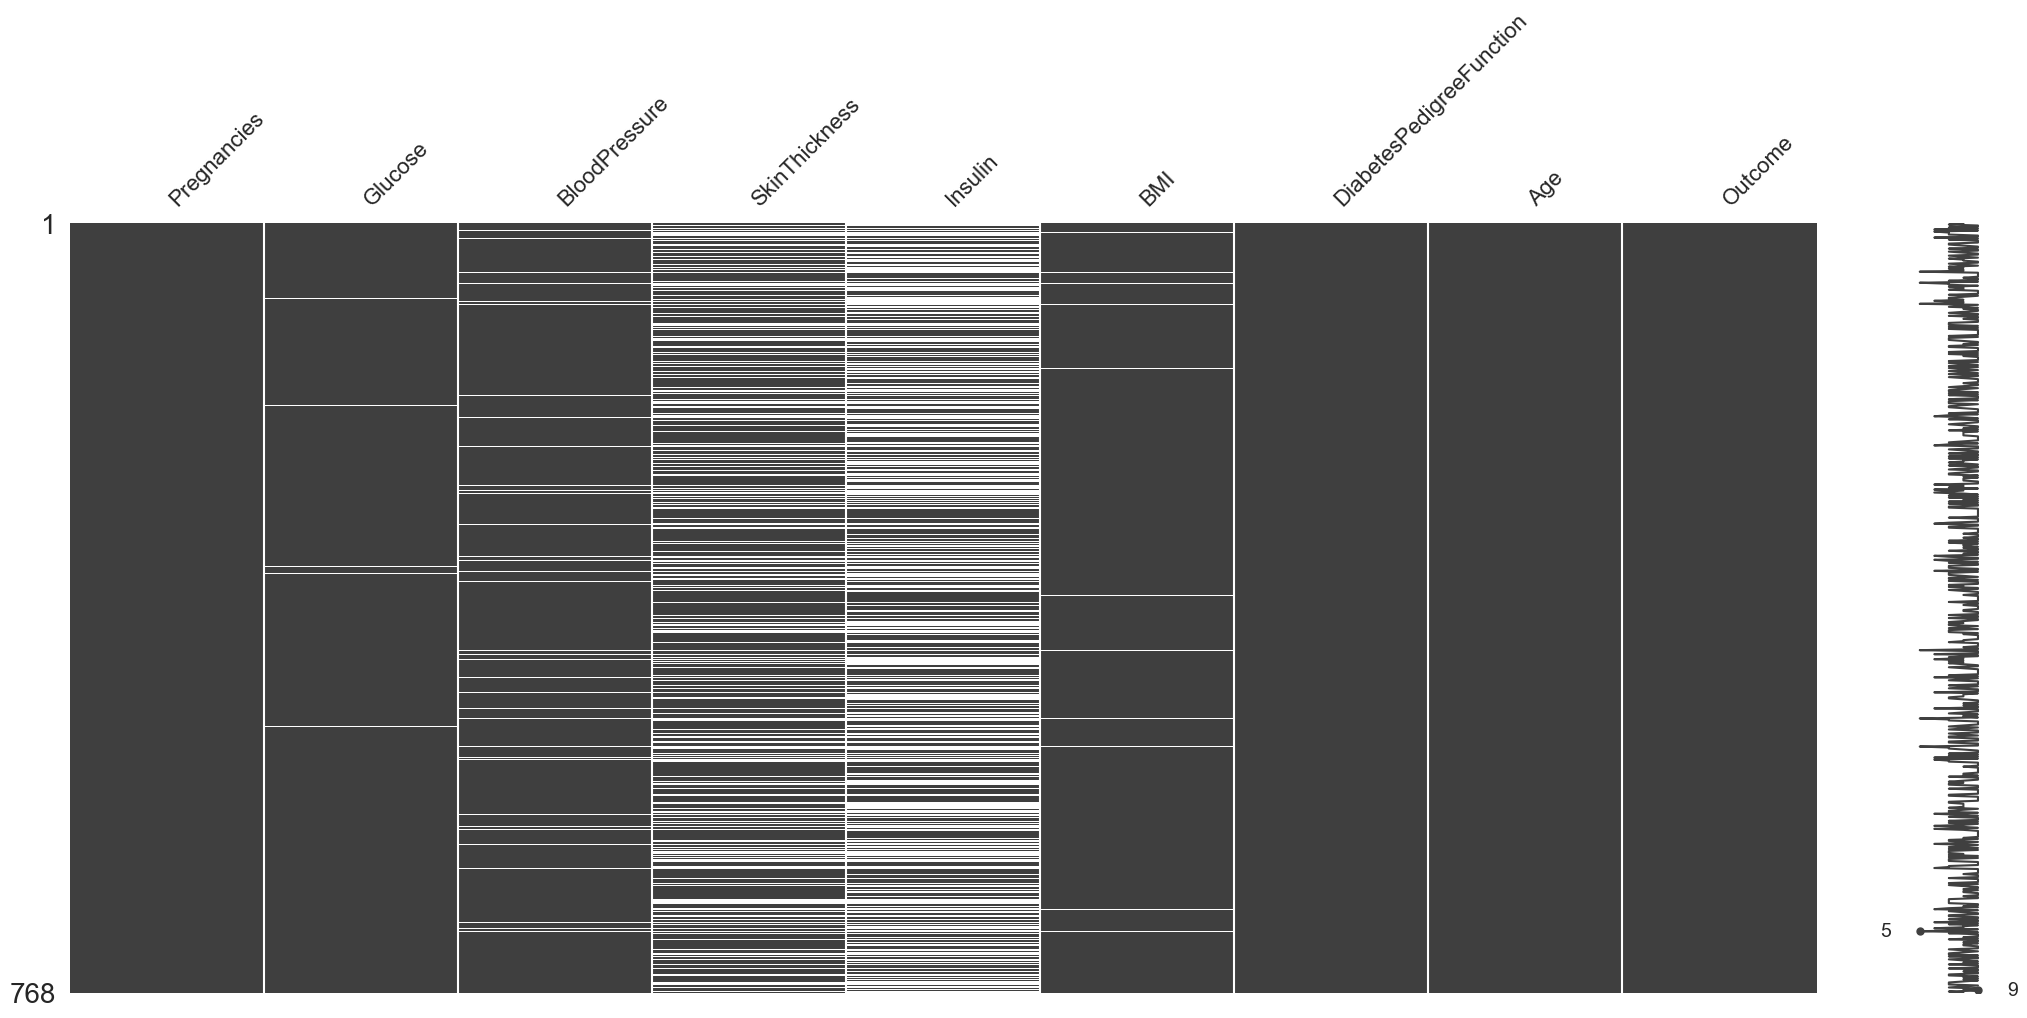

In [29]:
diabetes_data_copy  = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())
#it returns a Boolean mask of the same shape as the original data, 
# where each element in the mask is True if the corresponding element in the original data 
# is missing or null, and False if it is not null.


## null count analysis
import missingno as msno
#p=msno.bar(diabetes_data_copy)
p=msno.matrix(diabetes_data_copy)
#This function generates a matrix that provides a visual summary of missing values in the dataset. 
# Each row represents an entry (or row) in the dataset, and each bar in the row indicates the presence or absence of data 
# for that specific feature (column).

#### To fill these NaN values the data distribution needs to be understood

But why? -> Understanding the distribution of your data is crucial when deciding how to handle missing values (NaNs) for several reasons:

1. **Choosing the Right Imputation Method**: Different data distributions might require different imputation methods. For instance, for normally distributed data, the mean might be a good choice. However, for skewed data, the median might be more appropriate. 

2. **Avoiding Bias**: Blindly filling NaN values without understanding the distribution can introduce bias. For example, using the mean to fill NaN values in a highly skewed dataset can shift the overall distribution and lead to misleading results in subsequent analyses.

3. **Identifying Outliers**: Before imputing missing values, it's essential to identify and handle outliers. An understanding of the data distribution can help in this process. Filling NaNs without considering outliers can again introduce bias.

4. **Data Nature and Patterns**: Sometimes, the nature of missingness itself can be dependent on the distribution of the data. For example, data might be missing more frequently for extreme values. Knowing this can influence the imputation method you choose.

5. **Considering Model Assumptions**: Many statistical models and machine learning algorithms assume specific data distributions (e.g., linear regression assumes normally distributed residuals). If you don't fill NaNs considering the distribution, you might end up violating these assumptions, leading to unreliable predictions or inferences.

6. **Understanding Underlying Mechanisms**: There are different mechanisms that cause missing data: Missing Completely at Random (MCAR), Missing at Random (MAR), and Missing Not at Random (MNAR). Understanding the distribution and patterns in your data can help diagnose which mechanism is at play, which in turn can guide your imputation strategy.

7. **Evaluating the Impact of Imputation**: After imputing missing values, it's essential to compare the distribution of the imputed data to the original data to ensure that the imputation hasn't significantly altered the data characteristics.

8. **Choosing Advanced Imputation Methods**: More sophisticated imputation methods, like model-based imputation (e.g., KNN imputation, regression imputation, or using algorithms like MICE), require an understanding of the data distribution to be effectively applied.

9


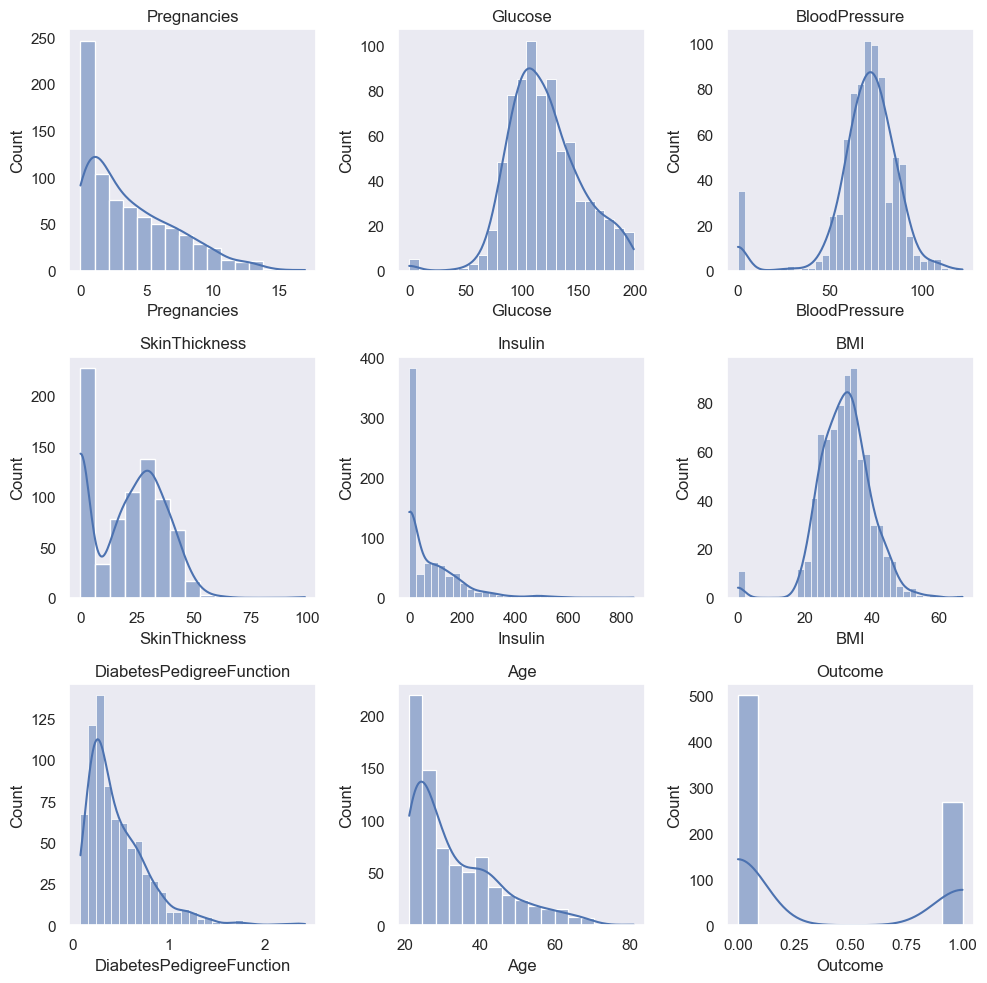

In [31]:
#number of columns in your dataframe
num_columns = len(diabetes_data.columns)
print(num_columns)

#set up the subplots with specified number of rows and columns 
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (10,10))

for ax, column in zip(axes.ravel(), diabetes_data.columns):
    sns.histplot(diabetes_data[column], kde = True, ax=ax)
    ax.set_title(column)
    ax.grid()

plt.tight_layout()
plt.show()

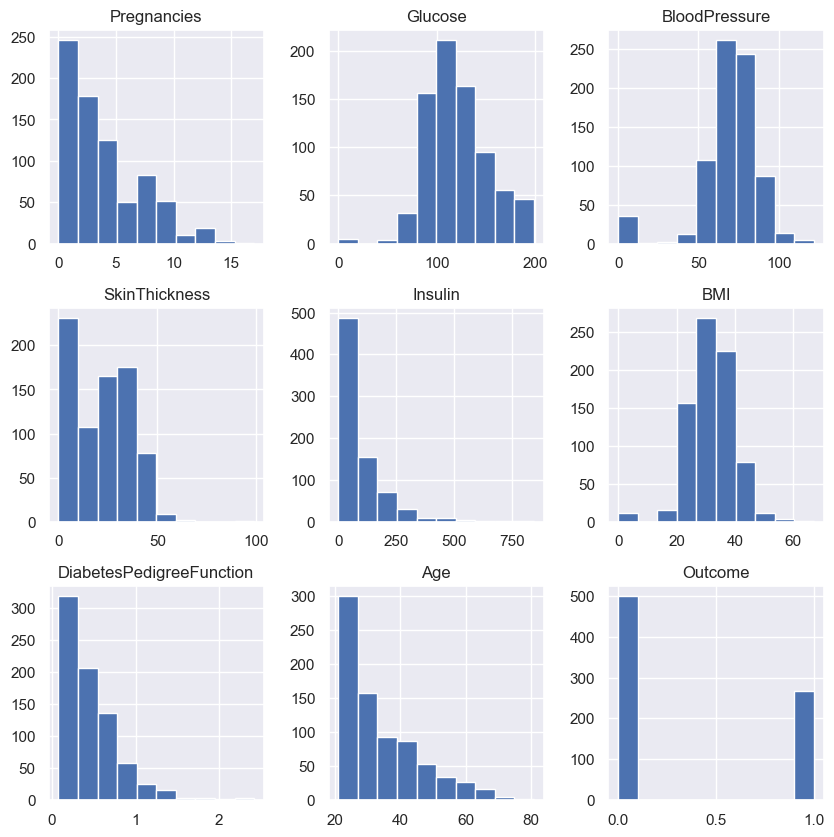

In [32]:
#or simpy 
p = diabetes_data.hist(figsize = (10,10))

# Mean or Median?



## Mean (or Average)

- The mean is calculated by adding up all the numbers in a dataset and then dividing by the count of those numbers.
  
  mean = sum(vals) / count(vals)
  
- The mean is sensitive to extreme values or outliers. A single very high or very low value can significantly change the mean.

---

## Median

- The median is the middle value in a dataset when the numbers are arranged in ascending or descending order. 
- If there's an odd number of values, the median is the middle one.
- If there's an even number of values, the median is the average of the two middle numbers.
  
- The median is resistant to outliers. Extreme values, either very high or very low, do not affect the median as much as they do the mean.

---

### Differences

1. **Calculation**: Mean is the sum of all values divided by the number of values. Median is the middle value when data is arranged in order.
  
2. **Sensitivity to Outliers**: Mean is affected by outliers, whereas median is more robust and less sensitive to them.

3. **Representation**: In a skewed distribution, the mean tends to be pulled in the direction of the skew, while the median tends to resist this pull and remains more centrally located.



### Aiming to impute NaN values for the columns in accordance with their distribution

In [7]:
#we have to replace all the zeros with the NaN. 
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

#we need to make all the data compatible with the NaN value we want to use. 
#after the change, we didn't do the change for pregnacy and other data
#we can see clearly where there is missing stuff. There are eary ways to visualize missing values. 

#we need to understand the distrbution of tha data. Is NaN a good approach ALWAYS?
#if we randomly sample from it, we can see something 
#somehow the same entry is missing both then an argument

#we have to somehow choose how to manage this NaN. we need to check the distribution of all these features. 

## Plotting after NaN removal 

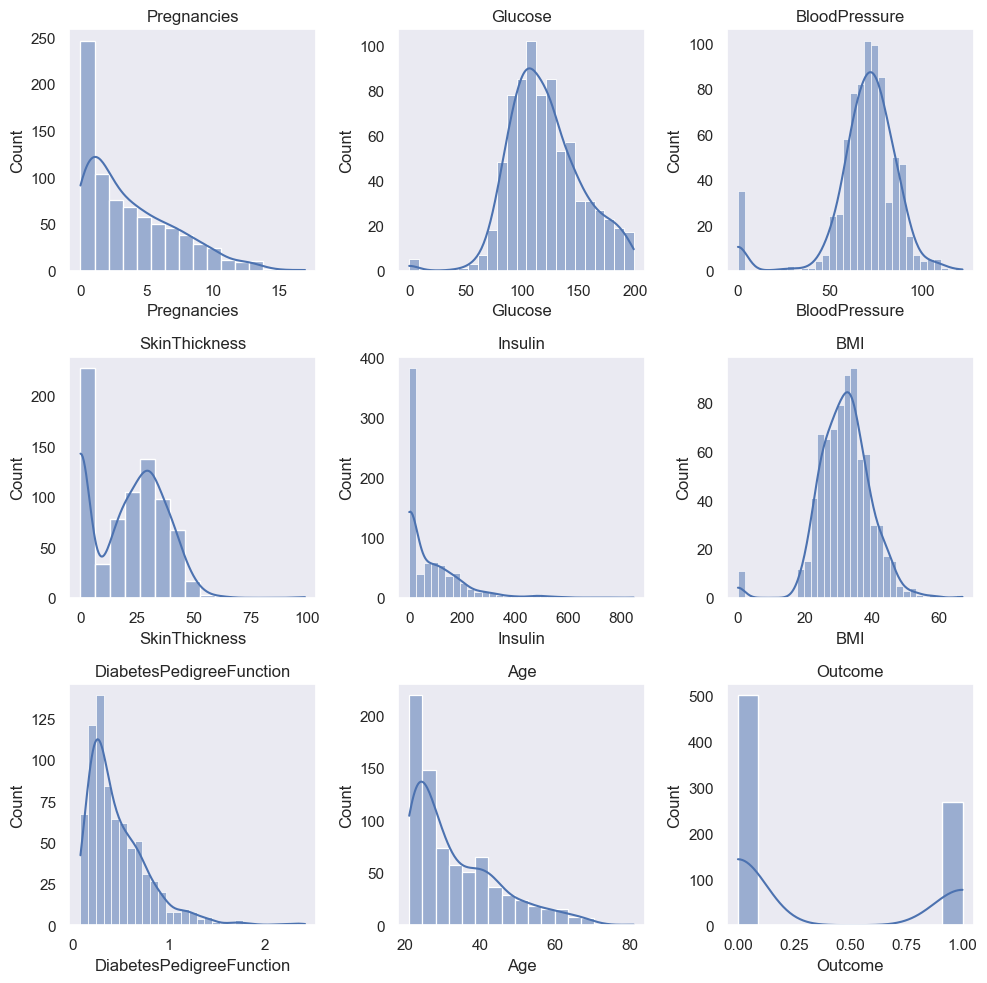

In [34]:
# Number of columns in your dataframe
num_columns = len(diabetes_data.columns)

# Set up subplots with specified number of rows and columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))

for ax, column in zip(axes.ravel(), diabetes_data.columns):
    sns.histplot(diabetes_data[column], kde=True, ax=ax) #kde=True to get the curve design on the hists
    ax.set_title(column)
    ax.grid()

plt.tight_layout() #adjust the spacing between subplots to improve the layout of the overall figure
plt.show()

## Skewness

A ***left-skewed distribution*** has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A ***right-skewed distribution*** has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.


![](https://www.statisticshowto.com/wp-content/uploads/2014/02/pearson-mode-skewness.jpg)


In both types of skewness, it's crucial to recognize that the "tail" reflects the range of values with fewer observations, while the peak (or mode) indicates the most frequently occurring values. Understanding the skewness direction can provide insights into the nature of the data, potential outliers, and the overall distribution of values in a dataset. It also offers hints about the central tendencies and how they relate to one another within the dataset.



### Left-Skewed Distribution (Negative Skewness)

A ***left-skewed distribution***, also known as a negatively-skewed distribution, has a tail that stretches out further to the left, and not to the right. Here are some key features and implications:

1. **Tail Direction**: The "tail" in a left-skewed distribution refers to the part of the distribution that has an extended range of values with fewer data points, which extends towards the left side of the graph.

2. **Central Tendency Observations**: In a left-skewed distribution, the mean (average) is typically less than the median, and the median is less than the mode. This is due to the influence of the extended tail pulling the average value in the direction of the skew.

3. **Real-world Examples**: Examples might include age at retirement from a job that most people retire from relatively young, or scores on a difficult exam where most participants score high.

4. **Implications for Analysis**: Left-skewed distributions can influence assumptions made in statistical testing and modeling. For instance, certain parametric tests might require data to be approximately normally distributed, so recognizing and addressing skewness can be essential.


### Right-Skewed Distribution (Positive Skewness)

A ***right-skewed distribution***, sometimes termed as having positive skewness, has a tail that stretches out to the right, towards the higher numbers. Here are its characteristics and implications:

1. **Tail Direction**: In a right-skewed graph, the tail part of the distribution is more stretched out to the right, rather than to the left, suggesting an extended range of higher values with fewer data points populating them.

2. **Central Tendency Observations**: For right-skewed distributions, the mean is generally greater than the median, and the median is greater than the mode, indicating the influence of the tail on the average value of the distribution.

3. **Real-world Examples**: Situations that might produce right-skewed data include income distributions in economies where a few individuals amass significant wealth, or the lifespan of a product where most items might fail early on, but some last significantly longer.

4. **Implications for Analysis**: Like with left-skewed distributions, right-skewed distributions may require transformations or alternative analytical methods if the analysis assumes normally-distributed data.


Learn more about skewness on https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/

In [35]:
## observing the shape of the data
diabetes_data.shape

(768, 9)

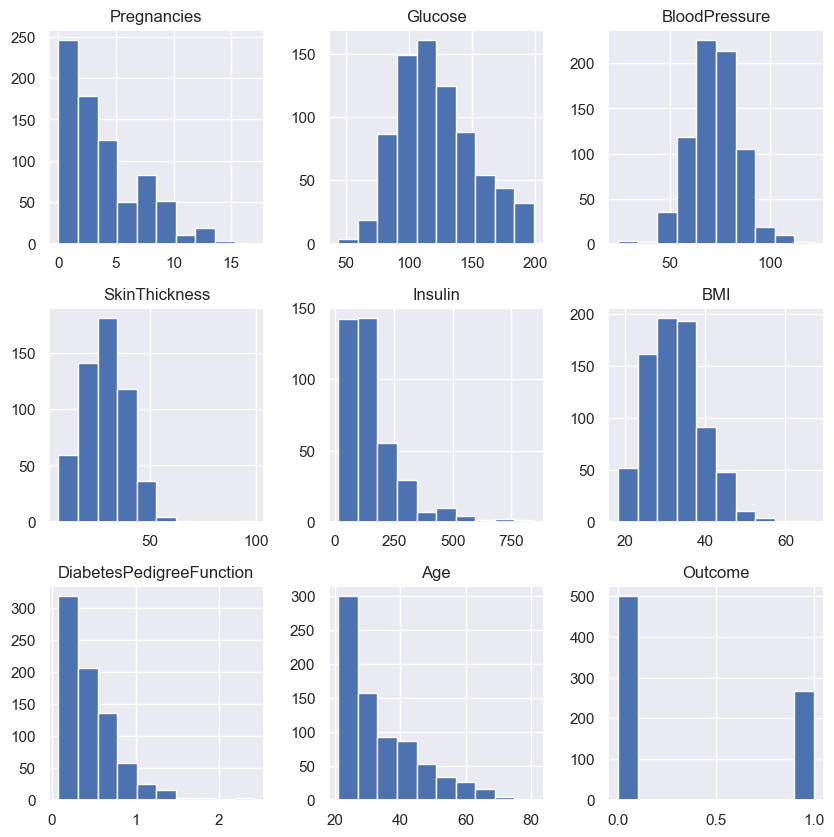

In [33]:
p = diabetes_data_copy.hist(figsize = (10,10))

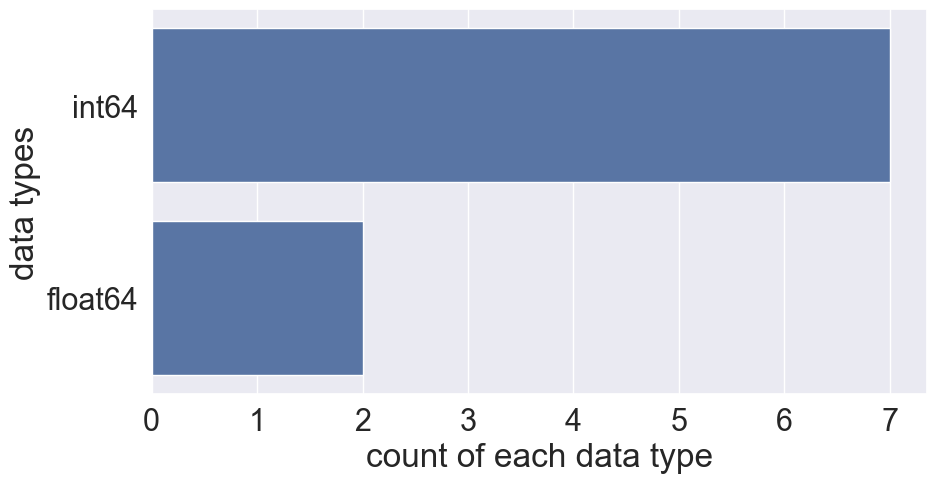

In [36]:
## data type analysis
plt.figure(figsize=(10,5))
sns.set(font_scale=2)
#A font_scale value greater than 1 increases the font sizes, making the text in the plots larger.
#A font_scale value less than 1 decreases the font sizes, making the text smaller in the plots.
sns.countplot(y=diabetes_data.dtypes ,data=diabetes_data)
#counts the observarion in each category
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

## Null count analysis

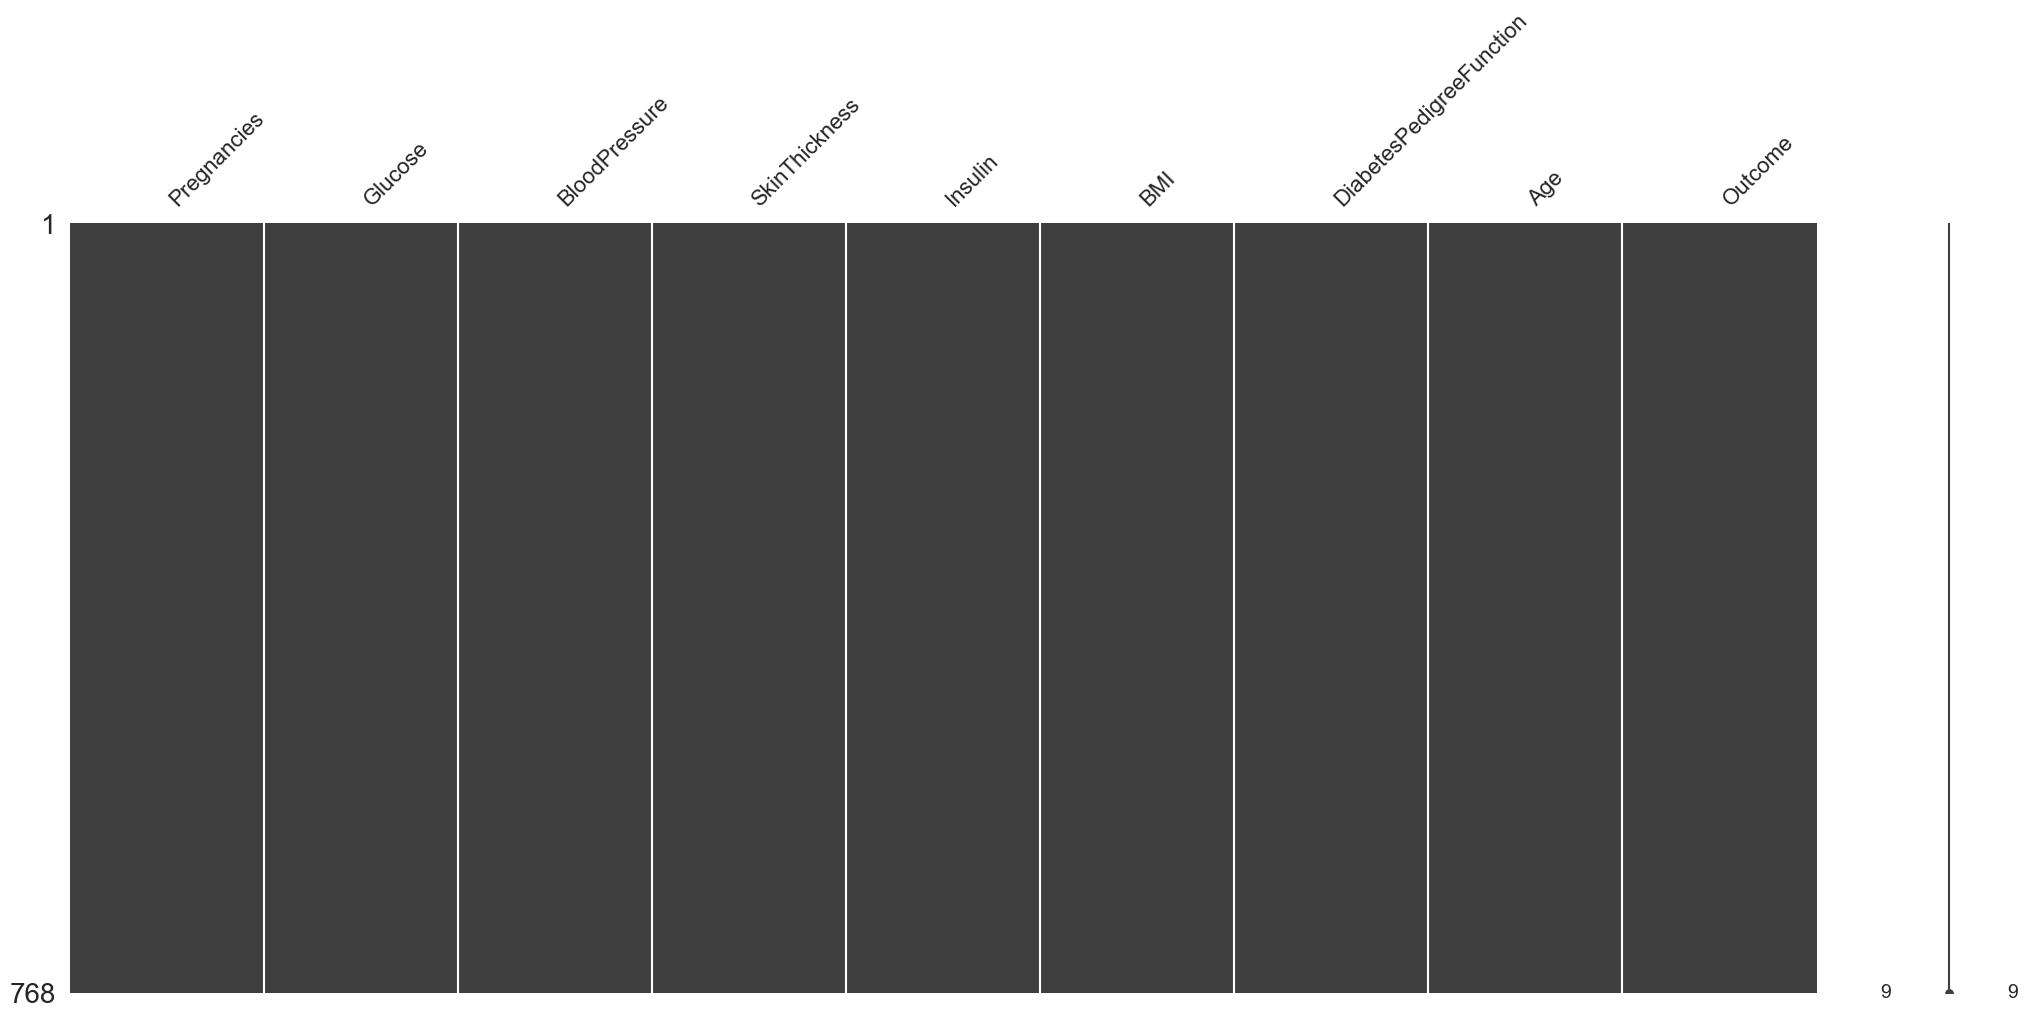

In [37]:
import missingno as msno
#p=msno.bar(diabetes_data)
p=msno.matrix(diabetes_data)

Outcome
0    500
1    268
Name: count, dtype: int64


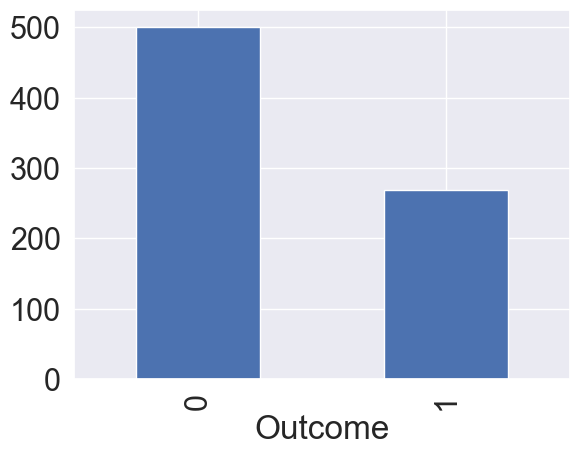

In [39]:
#checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf",
               2: "#7bc043"}
colors = diabetes_data['Outcome'].map(lambda x: color_wheel.get(x+1)) #map to apply a function to each element of a series
print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="bar")

#### The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

#### Scatter matrix of uncleaned data

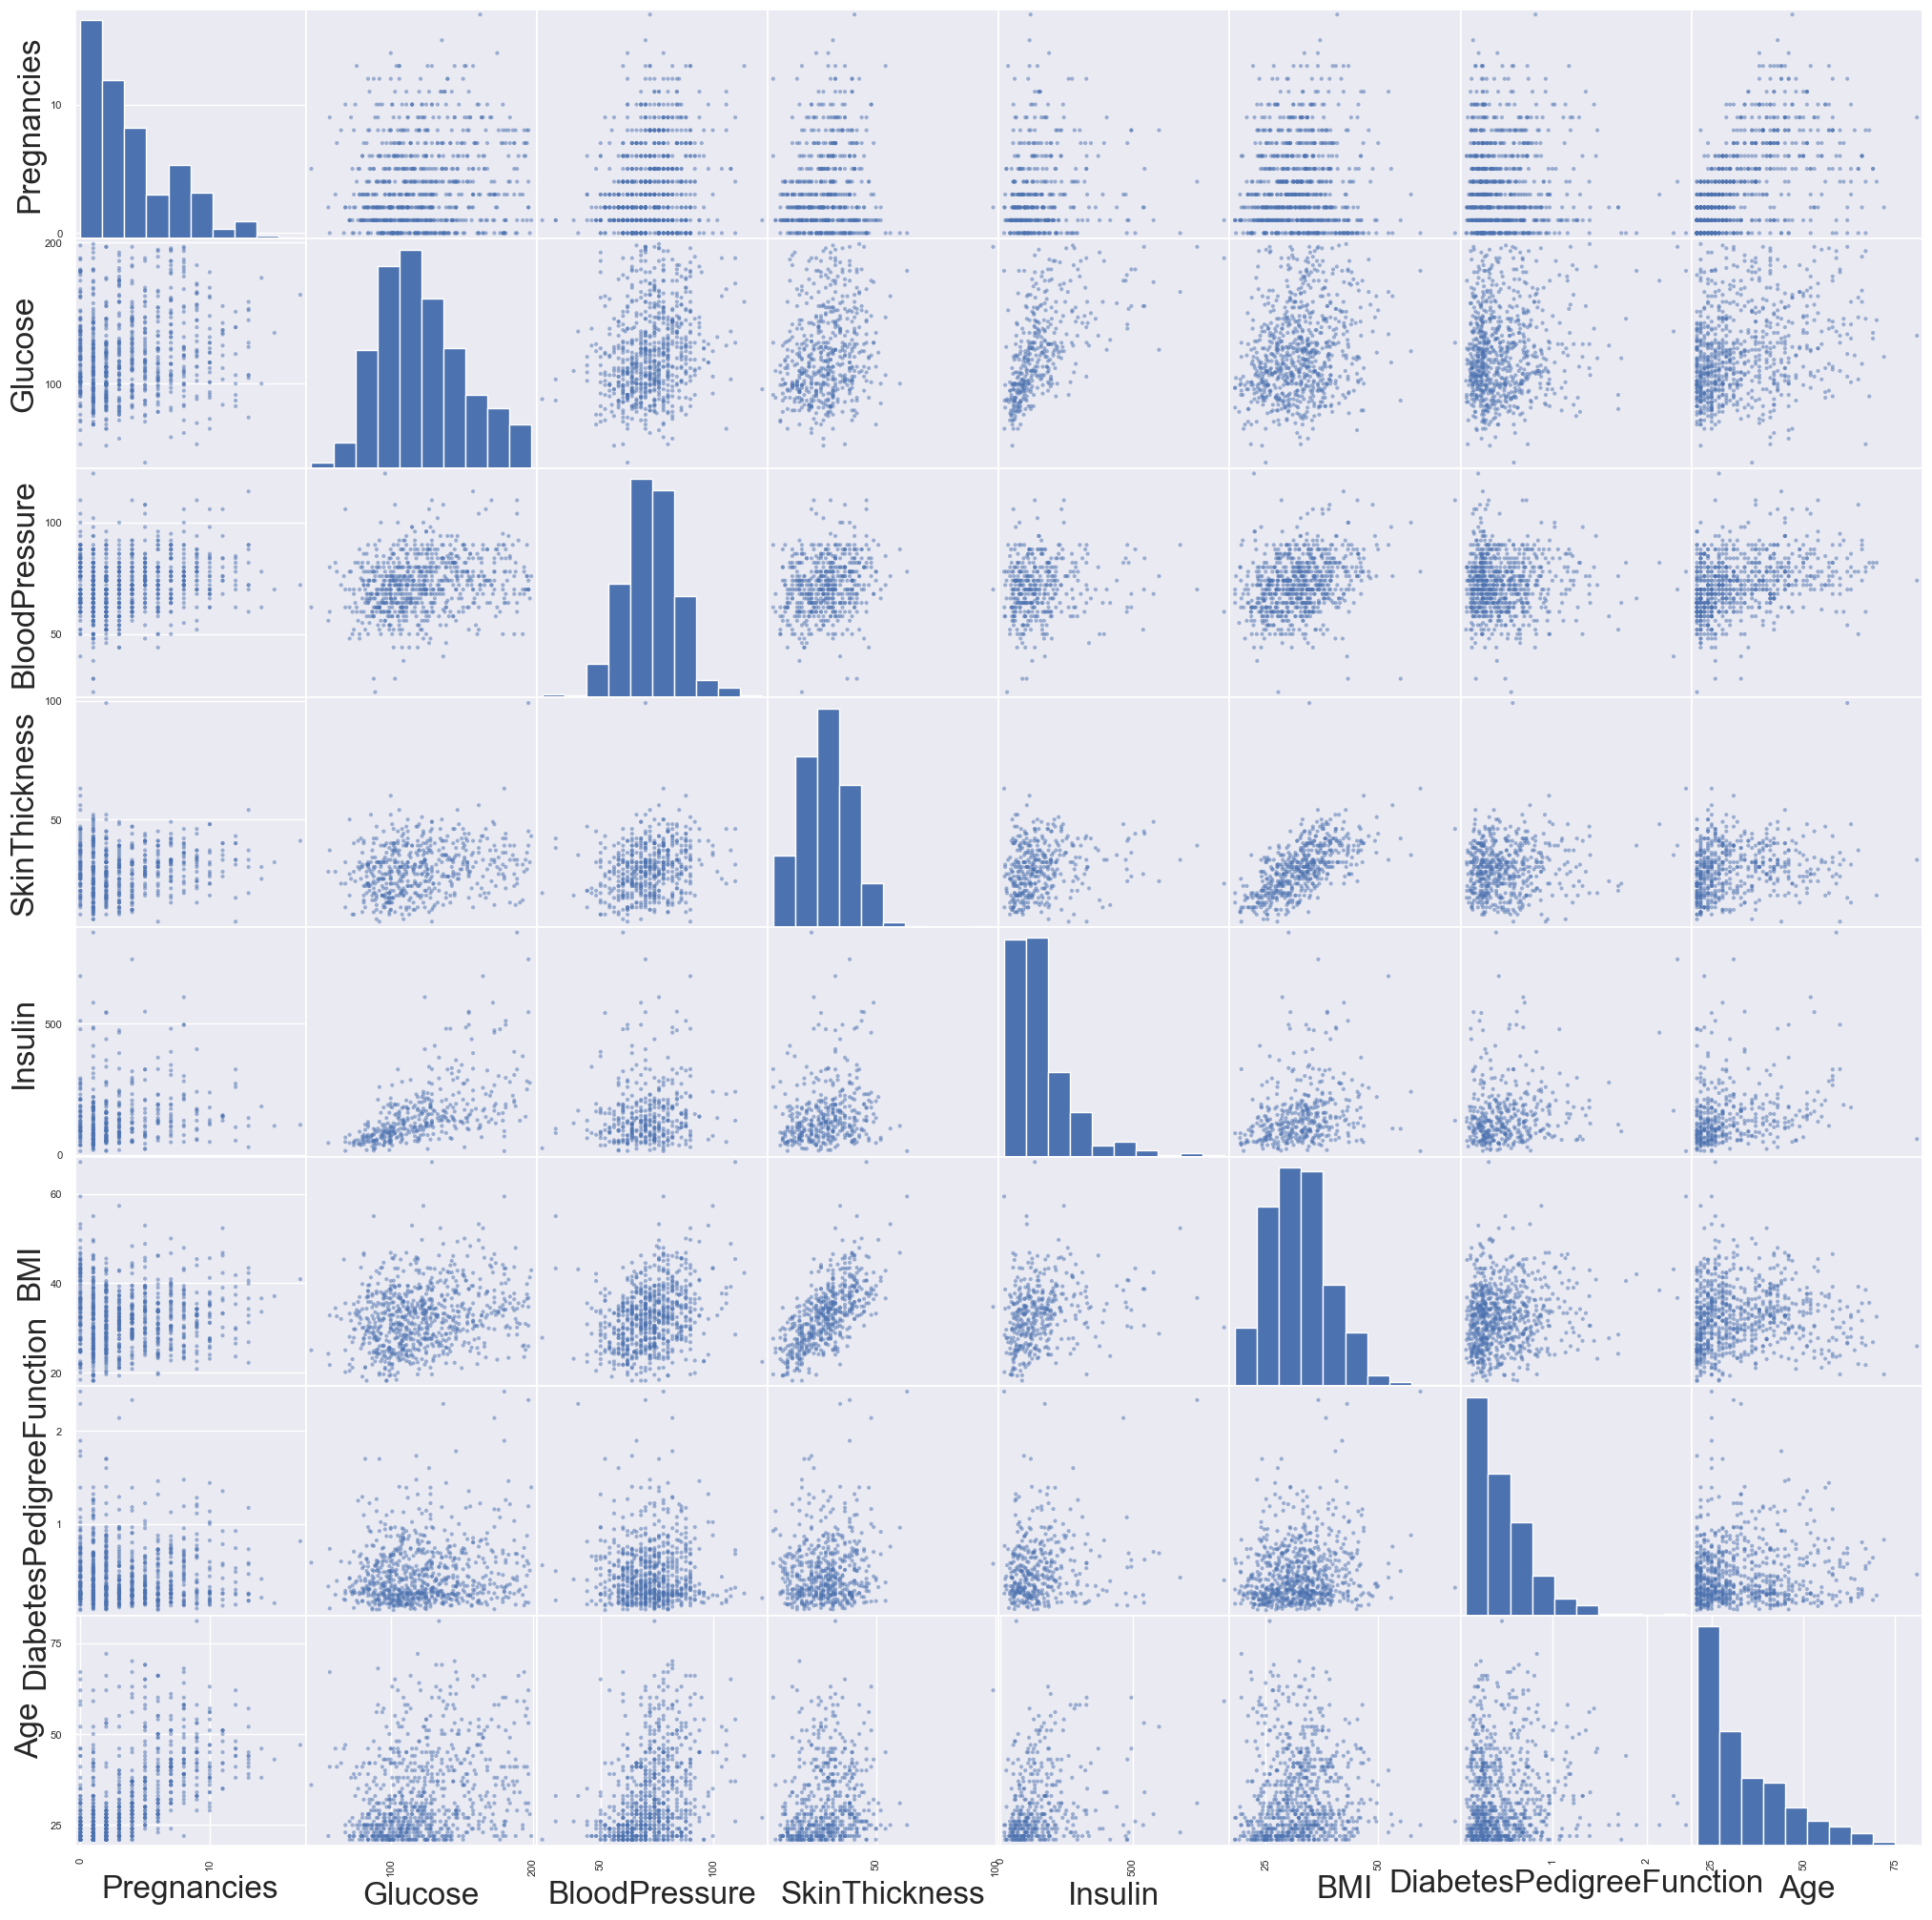

In [40]:
from pandas.plotting import scatter_matrix
p = scatter_matrix(diabetes_data_copy.drop("Outcome", axis = 1),figsize =(25,25))

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

For Reference: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

#### Pair plot for clean data

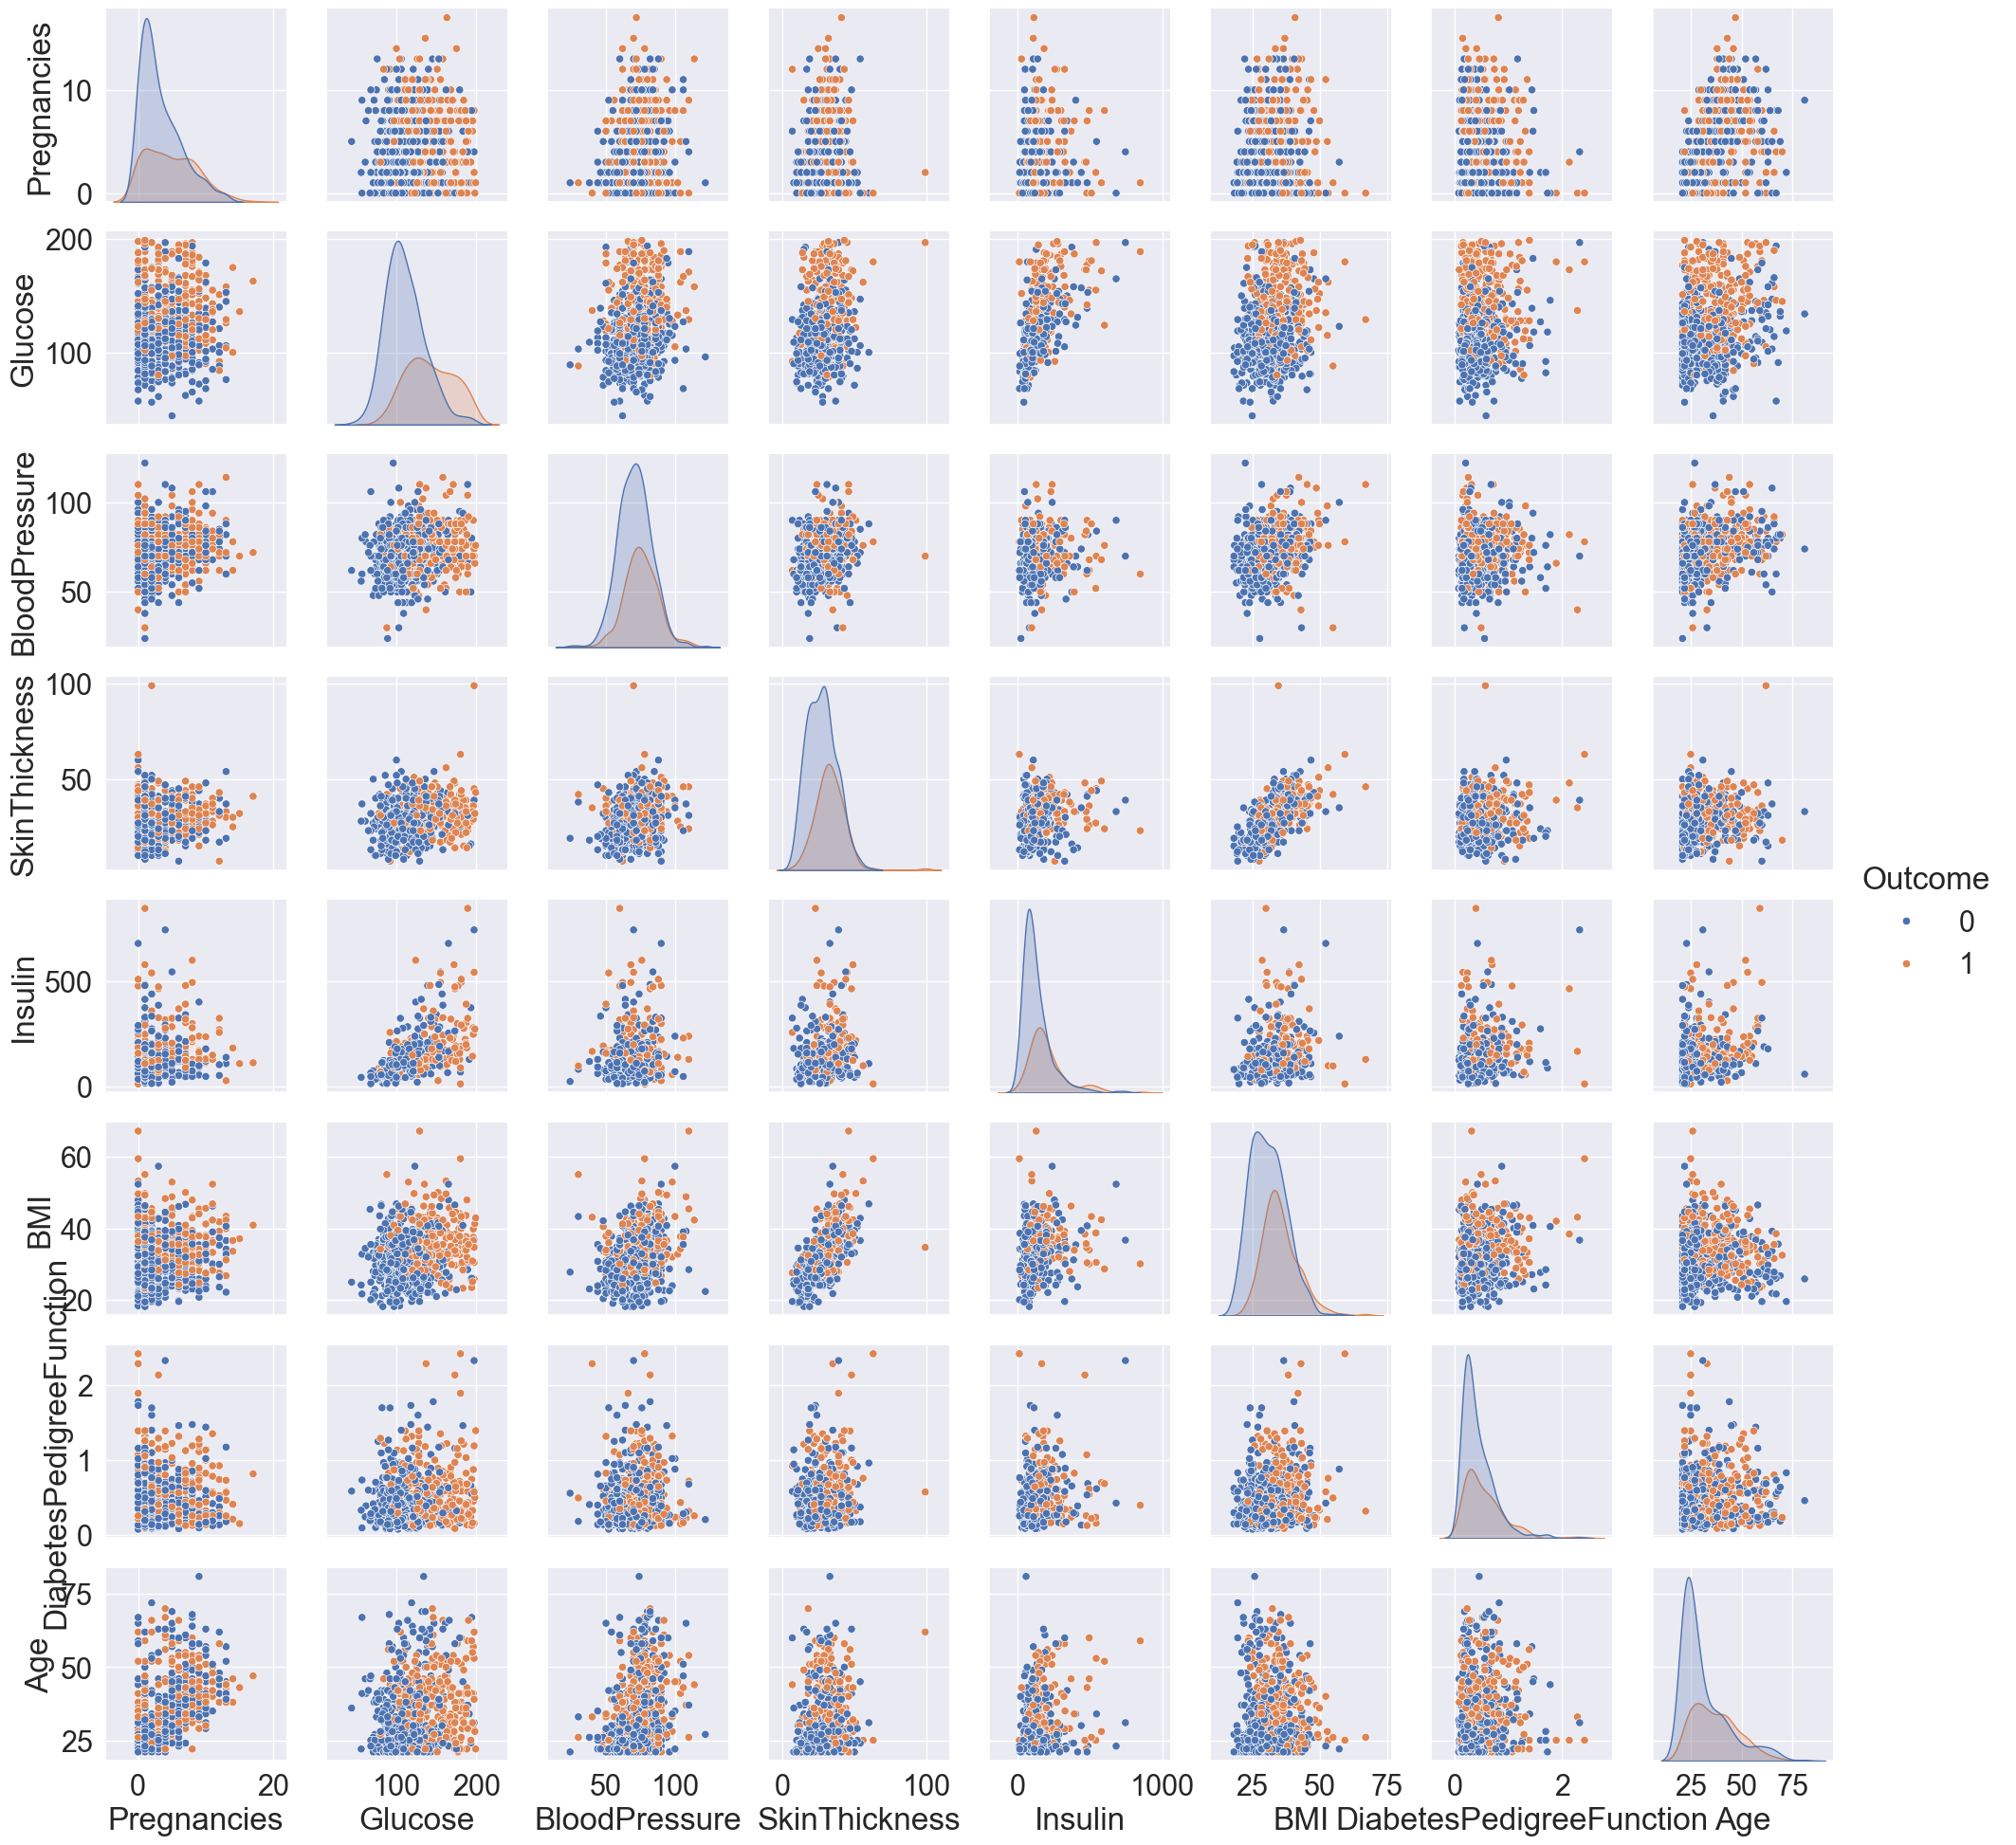

In [41]:
p = sns.pairplot(diabetes_data_copy, hue = 'Outcome')

## Pearson's Correlation Coefficient

The Pearson Correlation Coefficient, often denoted by \( r \), is a statistical metric that measures the linear relationship between two variables. It is one of the most widely used correlation coefficients and provides insights into the direction and strength of the linear relationship between the two variables.

Here are some key points about the Pearson Correlation Coefficient:

1. **Range**: The coefficient \( r \) ranges between -1 and 1.
    - \( r = 1 \): Perfect positive linear correlation. This means that as one variable increases, the other variable increases proportionally.
    - \( r = -1 \): Perfect negative linear correlation. This means that as one variable increases, the other decreases proportionally.
    - \( r = 0 \): No linear correlation. It's important to note that this does not necessarily mean there is no relationship, but rather that there is no *linear* relationship.


2. **Computation**: The formula for \( r \) is given by:
   \[ r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}} \]
   Where:
   - \( x_i \) and \( y_i \) are individual data points.
   - \( \bar{x} \) and \( \bar{y} \) are the means of the \( x \) and \( y \) data sets, respectively.


3. **Causation vs. Correlation**: A high Pearson correlation coefficient (close to 1 or -1) indicates a strong linear relationship, but it does not indicate causation. Just because two variables are correlated doesn't mean one causes the other.


4. **Limitations**: 
    - Pearson correlation only captures linear relationships. If the relationship is nonlinear, \( r \) might be close to zero even if there is a strong relationship.
    - Outliers can have a strong effect on the coefficient. A single outlier can significantly change the value of \( r \).
    - It assumes that the data is normally distributed, and the variables have constant variance (homoscedasticity).


5. **Applications**: The coefficient is used in various fields, from finance to biology, to determine the linear relationships between variables. It's frequently used in regression analysis and is the basis for parametric tests that compare means of normally distributed data.

In summary, the Pearson Correlation Coefficient is a measure of the strength and direction of a linear relationship between two variables.

## Heatmap

A heatmap of a correlation matrix is a graphical representation where individual values in the matrix are represented as colors. The primary purpose of this visualization is to easily and quickly discern patterns and relationships among multiple variables at once. When used for correlations, it provides a visual summary of how variables relate to each other.

Key aspects of a heatmap of a correlation:

1. **Color Spectrum**: Heatmaps usually employ a color spectrum or gradient to represent values. Commonly, a gradient from a cool color (like blue) to a warm color (like red) is used. Blue might indicate negative correlations, white (or a neutral color) indicates no correlation, and red indicates positive correlations. The darker the shade, the stronger the correlation.

2. **Scale**: Alongside the heatmap, there's usually a colorbar or legend which indicates what numerical values the colors correspond to. This helps in interpreting the strength of the correlation visually.

3. **Symmetry**: Since a correlation matrix is symmetrical around its main diagonal, the top-right triangle of the matrix is a mirror image of the bottom-left triangle. Both triangles convey the same information. Hence, sometimes only one half of the heatmap is shown for clarity.

4. **Annotations**: Many heatmaps also include numerical annotations within the cells. This allows the viewer to not only see the color representation but also the exact correlation coefficient.

5. **Hierarchical Clustering (Optional)**: Some heatmaps might reorder the rows and columns based on similarity (hierarchical clustering) to group variables with similar patterns together. This can make patterns more evident, especially in larger datasets.

6. **Applications**:
   - **Exploratory Data Analysis**: Quickly identify variables that are closely related or have no relationship.
   - **Feature Selection**: In machine learning, strong correlations between independent variables (multicollinearity) can be problematic. A heatmap can help in spotting and addressing this.
   - **Domain Understanding**: Understand which variables or features in a dataset move together, which can lead to better domain understanding or insights.

7. **Interpretation**: 
   - A block of cells with a warm color (e.g., red) indicates variables that are positively correlated.
   - A block of cells with a cool color (e.g., blue) indicates variables that are negatively correlated.
   - Cells colored with a neutral color (e.g., white or gray) indicate little to no correlation.

The heatmap of a correlation matrix is a powerful tool to visualize and understand the relationships among multiple variables simultaneously. It offers an immediate visual summary of the data's structure, which can then be analyzed more deeply with other statistical methods or tools.

#### Heatmap for unclean data

Colormaps reference https://matplotlib.org/stable/users/explain/colors/colormaps.html

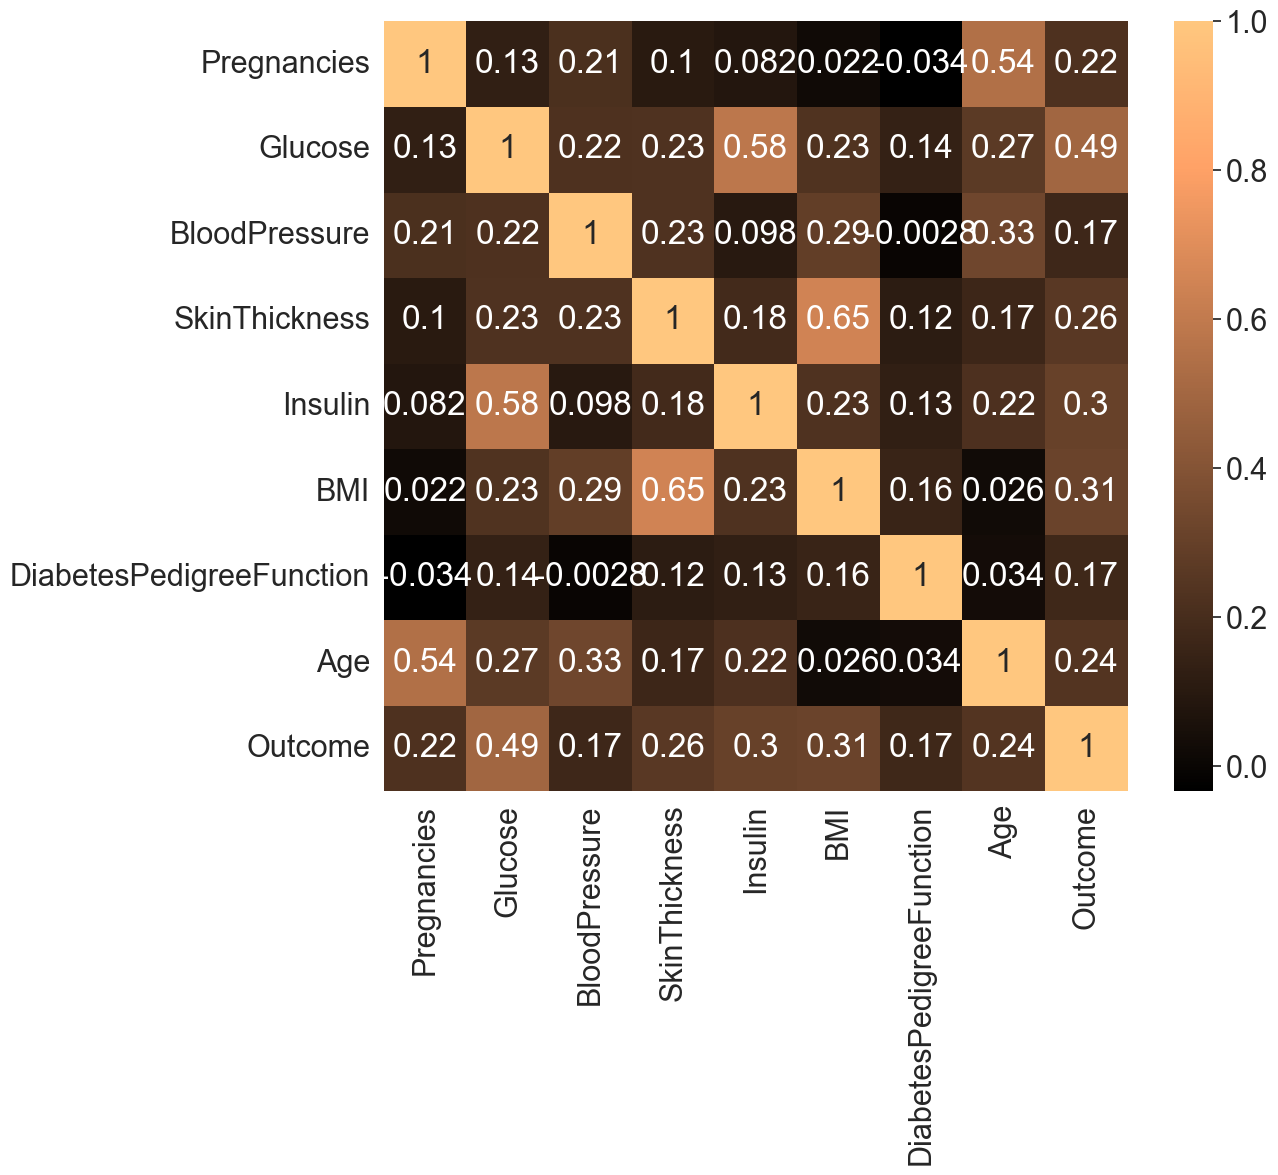

In [42]:
plt.figure(figsize = (12,10)) #on this line I just set the size of the figure
p = sns.heatmap(diabetes_data_copy.corr(), annot = True, cmap = 'copper') 
#seaborn has very simple solution for heatmap

#parameter is used to add annotations to each cell of the heatmap, displaying the actual numeric value in each cell of the plot.

#When annot is set to True, the values from the data are displayed in each cell of the heatmap. 
#If the data is a 2D dataset (such as a correlation matrix or any other numerical data), 
# these annotations give an immediate view of the values corresponding to each cell in the plot.

#### Heatmap for clean data

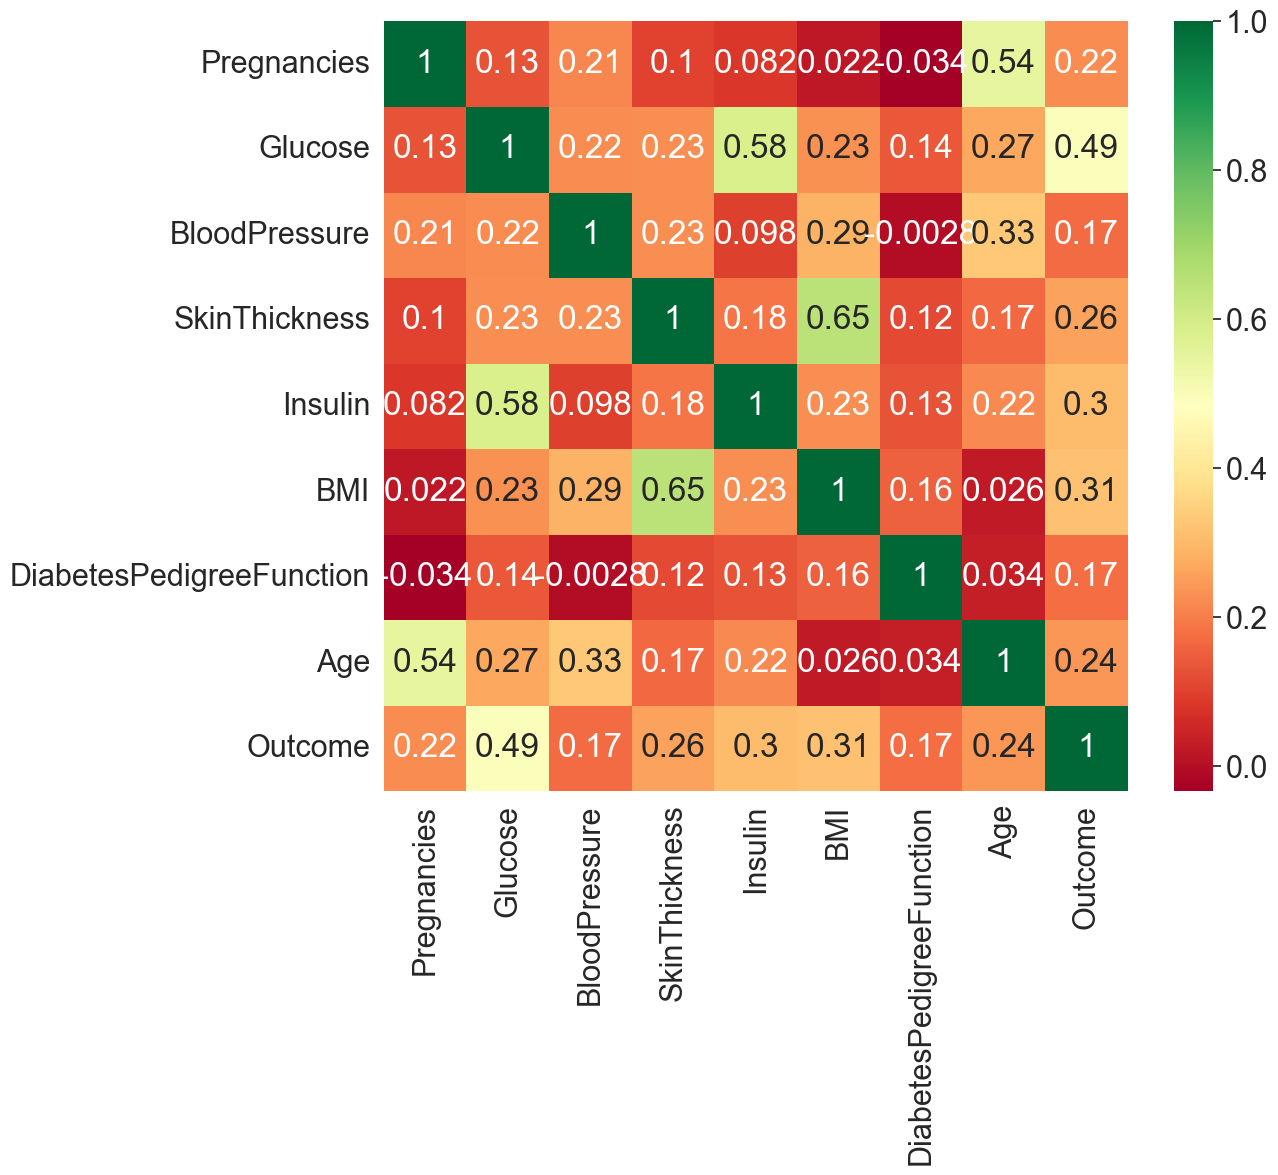

In [43]:
plt.figure(figsize = (12,10)) #only setting the size of the figure
p = sns.heatmap(diabetes_data_copy.corr(), annot = True, cmap = 'RdYlGn')


## Scaling the data 
data Z is rescaled such that μ = 0 and 𝛔 = 1, and is done through this formula:

![](https://cdn-images-1.medium.com/max/800/0*PXGPVYIxyI_IEHP7.)


#### to learn more about scaling techniques
https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc
https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/

## StandardScaler

`StandardScaler` is a preprocessing technique used in machine learning and statistics. It standardizes the features of a dataset by removing the mean and scaling each feature to unit variance. This process can be crucial for the performance of many algorithms, especially those that are sensitive to the scale of features.

### Key Features:

- **Formula**:
  Given a feature with values \( x_1, x_2, ... x_n \), the standardized value \( z \) for a given value \( x \) is:
  \[ z = \frac{x - \mu}{\sigma} \]
  Where:
  - \( \mu \) is the mean of the feature.
  - \( \sigma \) is the standard deviation of the feature.

- **Functionality**:
  1. **Centering**: Subtracting the mean of the feature from each data point, which centers the data around zero.
  2. **Scaling**: Dividing each data point by the standard deviation, which scales the data to have a standard deviation of 1.

- **Assumption**:
  `StandardScaler` assumes that the data is approximately normally distributed. If the data has a skewed distribution, other scalers like `MinMaxScaler` or `RobustScaler` might be more appropriate.

- **Significance in Algorithms**:
  Algorithms such as Support Vector Machines (SVM) or Principal Component Analysis (PCA) often assume that all features are centered around zero with similar variance. Features with substantially larger variance than others can dominate some algorithms, making them less effective.

- **Fit vs. Transform**:
  When working with both training and test data, it's important to fit the `StandardScaler` on the training data only. Then, use that fitted scaler to transform both the training and test data sets. This ensures consistent scaling.

In [46]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"], axis = 1),), #we drop outcome because it's what we want to predict
                 columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [47]:
X.sample(5)

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
441    -0.547919 -1.267769      -0.517645      -0.587871 -0.889764 -0.037204   
203    -0.547919 -0.743447      -0.194379      -1.256621 -0.940343 -1.742304   
654    -0.844885 -0.514057      -0.194379      -0.110193 -0.173220  0.251797   
642     0.639947  0.829517       0.613787            NaN       NaN -0.427354   
38     -0.547919 -1.038378      -0.356012       1.227307       NaN  0.829797   

     DiabetesPedigreeFunction       Age  
441                  0.075877 -0.956462  
203                 -0.715395 -0.531023  
654                 -0.996266 -0.956462  
642                 -0.887541  1.425995  
38                   0.093997 -0.531023

In [48]:
#X = diabetes_data.drop("Outcome", axis = 1)
y = diabetes_data_copy.Outcome

### Why Scaling the data for KNN?

#### it is always advisable to bring all the features to the same scale for applying distance based algorithms like KNN.
##### Let's see an example of distance calculation using two features whose magnitudes/ranges vary greatly.
Euclidean Distance = [(100000–80000)^2 + (30–25)^2]^(1/2)

Why scaling the data for KNN?
it's always advisable to bring all the feature to the same scale

#### We can imagine how the feature with greater range with overshadow or dimenish the smaller feature completely and this will impact the performance of all distance based model as it will give higher weightage to variables which have higher magnitude.

## Test Train Split and Cross Validation methods


**Train Test Split** involves dividing the dataset into two separate sets: one for training the model and the other for testing its performance.

![](https://cdn-images-1.medium.com/max/1600/1*-8_kogvwmL1H6ooN1A1tsQ.png)

 This separation is crucial for various reasons:

1. **Avoid Overfitting**:
   - **What is Overfitting?** Overfitting occurs when a model learns the training data so well that it performs poorly on new, unseen data. In other words, the model becomes too tailored to the training set, capturing even its noise and outliers.
   - **Role of Train Test Split**: By keeping a portion of the data (test set) unseen during the training process, we can ensure that the model's performance is evaluated on fresh, unseen data. If a model performs well on the training set but poorly on the test set, it's a clear sign of overfitting.

2. **Generalization**:
   - **Objective of Machine Learning**: One main goal in machine learning is to build models that generalize well to new data. A model's true test is how well it performs on data it hasn't seen before.
   - **Role of Train Test Split**: By evaluating a model on a test set, we get a better understanding of its generalization ability. A model that performs similarly on both training and test sets is likely to generalize well to new data.

3. **Model Performance**:
   - **Benchmarking**: The test set provides a benchmark to evaluate the model's performance using various metrics like accuracy, F1 score, or mean squared error, depending on the problem type.
   - **Comparing Models**: If we're trying different algorithms or tuning hyperparameters, the test set offers a consistent dataset to compare performances and select the best model.

4. **Real-world Expectation**:
   - In the real world, models will always encounter unseen data. By using a train-test split, we simulate this scenario during development, giving us a realistic view of how the model might perform post-deployment.

5. **Data Integrity**:
   - Keeping a test set untouched during training ensures that we have a set of data points that are not influenced by the model building process. This separation ensures the integrity and independence of the test results.

To implement a train-test split, one can use tools like `train_test_split` from `scikit-learn` in Python. It's also worth noting that, in many cases, data practitioners further split the training set into a **validation set**. This allows for model tuning and hyperparameter optimization before the final evaluation on the test set. The train-test split is an essential step in the model-building process. It helps in ensuring that models are robust, perform well on unseen data, and are not just memorizing the training data. Properly conducted, it can greatly aid in building reliable and high-performing machine learning models.

---

**Cross Validation** (CV) is a robust method used to assess how well a given model will generalize to an independent dataset. It does this by partitioning the original dataset into multiple subsets and iteratively training and testing the model on these subsets. 

![](https://cdn-images-1.medium.com/max/1600/1*4G__SV580CxFj78o9yUXuQ.png)

Here's a more detailed exploration:

1. **Overcoming Data Limitations**:
   - **Data Variability**: In any dataset, there might be certain patterns, noise, or random fluctuations. When we split the data just once into a training set and a test set, we might accidentally introduce a bias if one subset ends up containing data points that aren’t representative of the whole.
   - **Role of Cross Validation**: By splitting the data multiple times and in different ways, cross-validation reduces the chance that our model evaluation is based on one "lucky" or "unlucky" data split.

2. **K-Fold Cross Validation**:
   - **Most Common Technique**: In k-fold CV, the original dataset is randomly partitioned into \(k\) equal-sized subsets or "folds". Of the \(k\) subsets, a single subset is retained as the validation set for testing the model, and the remaining \(k-1\) subsets are used for training. This process is repeated \(k\) times, with each of the \(k\) subsets used exactly once as the validation set.
   - **Aggregate Results**: After \(k\) iterations, we end up with \(k\) different model evaluation scores. These can be averaged to obtain a more comprehensive and stable estimate of model performance.

3. **Stratified Cross Validation**:
   - **Balancing Classes**: In imbalanced datasets, where one class significantly outnumbers the other(s), there's a risk that a random split may end up with training or validation sets that don’t represent the class distribution well.
   - **Role of Stratified CV**: It ensures that each fold maintains the same distribution of classes as in the original dataset.

4. **Benefits**:
   - **Bias Reduction**: Multiple rounds of training and validation reduce the bias that might result from a single random split.
   - **Variance Reduction**: By averaging the evaluation scores from multiple folds, we obtain a more stable and reliable estimate of model performance.

5. **Computational Cost**:
   - **More Expensive**: One downside of CV is that it can be computationally expensive, especially with large datasets or complex models, since the model needs to be trained and validated multiple times.

6. **Model Selection and Hyperparameter Tuning**:
   - Cross-validation provides a more reliable estimate of model performance, making it invaluable when comparing different models or tuning hyperparameters. For example, tools like `GridSearchCV` in `scikit-learn` employ cross-validation to find the best hyperparameters for a given model.

7. **Mitigating Overfitting and Underfitting**:
   - **Model Robustness**: By training on different data subsets, CV helps ensure that the model isn’t just overfitting to a specific set of data points. Simultaneously, by validating on different subsets, it helps ensure the model isn’t too generalized or underfitting.

Cross-validation is a powerful technique that provides a more thorough and reliable assessment of a model's performance, addressing many of the pitfalls that can arise from a single train-test split. By using cross-validation, data scientists can build and select models with greater confidence in their predictive abilities.

---

***Stratify in Data Splitting*** When working with datasets, especially those with uneven class distributions, it's crucial that both training and test sets are representative of the overall class distribution. The `stratify` parameter helps ensure this representativeness. Here's a detailed explanation:

1. **The Problem with Random Splitting**:
   - Datasets, especially in classification problems, may have an unequal distribution of classes. For example, in medical datasets, the presence of a rare disease might be represented by only 5% of the samples.
   - A simple random split can result in vastly different class proportions in training and test sets. This disparity can lead to a model that's biased or performs poorly since it wasn't trained on a representative set of data.

2. **Role of Stratification**:
   - **Ensuring Representativeness**: Stratification aims to maintain the original class distribution of the dataset in both training and test sets.
   - **Avoiding Skewed Splits**: Without stratification, there's a risk, especially in datasets with a significant class imbalance, that the smaller class might be underrepresented or even completely left out from the test or training set. Stratification avoids this pitfall.

3. **Working Principle**:
   - When you set the `stratify` parameter to a target variable (often `y` in scikit-learn functions), the splitting mechanism will ensure both training and test datasets have the same proportion of class labels as the original dataset.
   - For instance, if the original dataset has 10% positives and 90% negatives, a stratified split will ensure that both training and test sets have the same 10-90% distribution.

4. **Use Cases**:
   - **Binary Classification**: Like in the provided example, if there's a 25-75% split between two classes, stratification ensures this ratio is preserved in both training and test sets.
   - **Multiclass Classification**: Stratification isn't limited to binary classification. If a dataset has multiple classes, the stratify parameter ensures that each class's distribution remains consistent across splits.

5. **Stratification in Cross Validation**:
   - In k-fold cross-validation, stratification can be crucial. The `StratifiedKFold` variant in libraries like `scikit-learn` ensures that each fold is a good representative of the overall class distribution.

6. **Advantages**:
   - **Model Robustness**: Training on stratified data can lead to models that are more robust and have better generalization capabilities.
   - **Fair Evaluation**: By testing the model on a stratified test set, you're more likely to get a performance measure that's representative of the model's performance on the actual class distribution.

7. **Considerations**:
   - While stratification is immensely useful, it's essential to remember that it doesn't change the inherent class distribution of the data. In extremely imbalanced scenarios, you might still need to consider other techniques like oversampling, undersampling, or using different evaluation metrics.

For Reference : https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

In [49]:
#test train split and cross validating method 
#we can use stratify for the stratitfication.
# It took him one week to write down the notebook

#train_test_split: train and test distribution would be compesed both for 2/3 of variables of mean zero. 
#it's pretty important!
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)

KNeighbors Classifier
It's a way of classifying. You take the easier way to classify: having or not having diabetes. You try to minimize the distance from the center of the cluster. Having or not having diabetes? This is the first thing. KN has as parameters the numbers of neighbours. If you have too much, it's affected by overfitting. 
#UP TO THE TRAINING SET FITTING FOR THIS NOTEBOOK. the other part we can ignore, it's low level in terms of python and more into datascience instead. It's up to us: what do we prefer to do?  